# Cluster Visualisation

Trying to keep this notebook as short and snappy as possible. Just reading in the groupby-mean results of the weekends/weekdays data and running K-Means. Based on the outputs of the ClusteringTest notebook, we know that the following cluster config will work best:

* Weekends: 8 Clusters
* Weekdays: 10 Clusters

We are good with hardcoding this into the notebook.

In [1]:
! ls -l ../dataset/

total 212595512
-rw-r--r--  1 sarmadtarar  staff      3258527 23 Apr 16:47 dataset_sample.csv
-rw-r--r--@ 1 sarmadtarar  staff    176473873 27 Apr 13:30 groupby_results_weekdayy_groupby_means.csv
-rw-r--r--@ 1 sarmadtarar  staff    169368141 27 Apr 13:30 groupby_results_weekend_groupby_means.csv
-rw-r--r--@ 1 sarmadtarar  staff     10023125 13 May 00:01 qut_it_capstone_ailbatross_20181029_nmi_attributes_20181029.csv
-rw-r--r--@ 1 sarmadtarar  staff  39929480142 24 Apr 17:12 qut_it_capstone_ailbatross_20181029_nmi_data_20181029.csv
-rw-r--r--@ 1 sarmadtarar  staff  28630797979 25 Apr 16:20 weekday_split_weekdays.csv
-rw-r--r--@ 1 sarmadtarar  staff  11298682512 26 May 15:00 weekday_split_weekends.csv
-rw-r--r--  1 sarmadtarar  staff  28630798272 26 May 15:35 weekdays.csv
-rw-r--r--  1 sarmadtarar  staff          293 26 May 15:20 weekends.csv


In [2]:
# Reading the Groupby-Mean output

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

'''
This function should read in the averaged dataset, then normalise it.
'''
def get_df_from_csv(filename):
    scaler = MinMaxScaler()
    numeric_columns = [f'ekw{i+1}' for i in range(48)]
    df = pd.read_csv(filename, index_col='nmi_uuid')
    df[numeric_columns] = scaler.fit_transform(
                                    df[numeric_columns].transpose()
                                ).transpose()
    return df[(df[numeric_columns] > 0.99).any(axis=1)]

weekend_df = get_df_from_csv('../dataset/groupby_results_weekend_groupby_means.csv')
weekday_df = get_df_from_csv('../dataset/groupby_results_weekdayy_groupby_means.csv')
attributes_df = pd.read_csv('../dataset/qut_it_capstone_ailbatross_20181029_nmi_attributes_20181029.csv', index_col='nmi_uuid')


# Run K-Means

Performs K-Means. I then use a Dendrogram to plot the relationships between the cluster centers.

Useful docs on dendrograms:
* https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

done


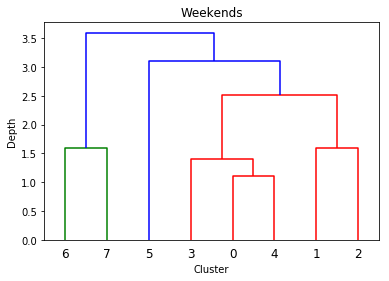

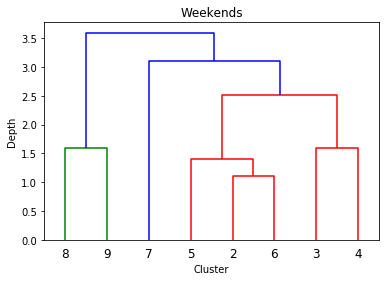

In [43]:
# Performing KMeans on the data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster, fclusterdata, dendrogram, leaders, linkage

numeric_columns = [f'ekw{i+1}' for i in range(48)]

kmeans_weekends = KMeans(
    n_clusters = 8
).fit(weekend_df[numeric_columns])

kmeans_weekdays = KMeans(
    n_clusters = 10
).fit(weekday_df[numeric_columns])

cluster_indices = range(n_clusters)


! say "done"
print('done')

# Save K-Means Clusters as a dataset

In [170]:
weekend_clusters = pd.DataFrame(kmeans_weekends.labels_,
                                columns=['weekend_cluster'],
                                index=weekend_df.index
                               )
weekend_centroids = pd.DataFrame(kmeans_weekends.cluster_centers_,
                                 columns=[f'ekw{i}' for i in range(48)]
                                )

weekday_clusters = pd.DataFrame(kmeans_weekdays.labels_, 
                                columns=['weekday_cluster'],
                                index=weekday_df.index
                               )
weekday_centroids = pd.DataFrame(kmeans_weekdays.cluster_centers_,
                                 columns=[f'ekw{i}' for i in range(48)]
                                )

# default behaviour of the join function is to order by keys
joined_dataset = weekend_clusters.join(weekday_clusters, how='right')

# if there is no weekday/weekend cluster allocated for a user, they will be a NaN
print(joined_dataset.isna().sum(numeric_only=True))
print('Difference in size: ', weekday_clusters.shape[0] - weekend_clusters.shape[0])
print(joined_dataset.shape)

# since there are less weekend users than weekday users, and we used the weekday index, we need to accommodate for the index
weekend_idx = joined_dataset.index.intersection(weekend_clusters.index)
weekend_cluster_idx = weekend_clusters.index.intersection(weekend_idx)


joined_dataset_matches_weekdays = joined_dataset[
    joined_dataset.index == weekday_clusters.index
]['weekday_cluster'] == weekday_clusters['weekday_cluster']


joined_dataset_matches_weekends = joined_dataset.loc[weekend_cluster_idx]['weekend_cluster'] == weekend_clusters.loc[weekend_cluster_idx]['weekend_cluster']

print('All weekends match in joined dataset: ', joined_dataset_matches_weekends.all())
print('All weekdays match in joined dataset: ', joined_dataset_matches_weekdays.all())


joined_dataset.to_csv('../dataset/joined_dataset.csv')
weekend_centroids.to_csv('../dataset/weekend_centroids.csv')
weekday_centroids.to_csv('../dataset/weekday_centroids.csv')

! ls -l ../dataset

weekend_cluster    3495
weekday_cluster       0
dtype: int64
Difference in size:  3470
(188461, 2)
All weekends match in joined dataset:  True
All weekdays match in joined dataset:  True
total 212611360
-rw-r--r--  1 sarmadtarar  staff      3258527 23 Apr 16:47 dataset_sample.csv
-rw-r--r--@ 1 sarmadtarar  staff    176473873 27 Apr 13:30 groupby_results_weekdayy_groupby_means.csv
-rw-r--r--@ 1 sarmadtarar  staff    169368141 27 Apr 13:30 groupby_results_weekend_groupby_means.csv
-rw-r--r--  1 sarmadtarar  staff      8093379  3 Jun 20:54 joined_dataset.csv
-rw-r--r--@ 1 sarmadtarar  staff     10023125 13 May 00:01 qut_it_capstone_ailbatross_20181029_nmi_attributes_20181029.csv
-rw-r--r--@ 1 sarmadtarar  staff  39929480142 24 Apr 17:12 qut_it_capstone_ailbatross_20181029_nmi_data_20181029.csv
-rw-r--r--  1 sarmadtarar  staff         9646  3 Jun 20:54 weekday_centroids.csv
-rw-r--r--@ 1 sarmadtarar  staff  28630797979 25 Apr 16:20 weekday_split_weekdays.csv
-rw-r--r--@ 1 sarmadtarar  staf

# Plot dendrograms 

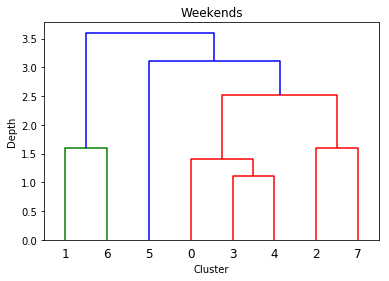

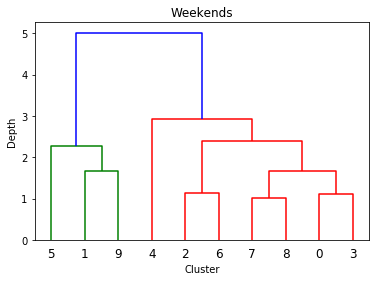

In [46]:
# Plot a dendrogram relationship between cluster centers
linkage_matrix_weekends = linkage(kmeans_weekends.cluster_centers_, 'ward')
plt.figure()
plt.title('Weekends')
plt.xlabel('Cluster')
plt.ylabel('Depth')
dendro = dendrogram(linkage_matrix_weekends, labels=range(8))

linkage_matrix_weekdays = linkage(kmeans_weekdays.cluster_centers_, 'ward')
plt.figure()
plt.title('Weekends')
plt.xlabel('Cluster')
plt.ylabel('Depth')
dendro = dendrogram(linkage_matrix_weekdays, labels=range(10))

# Plot K-Means Data

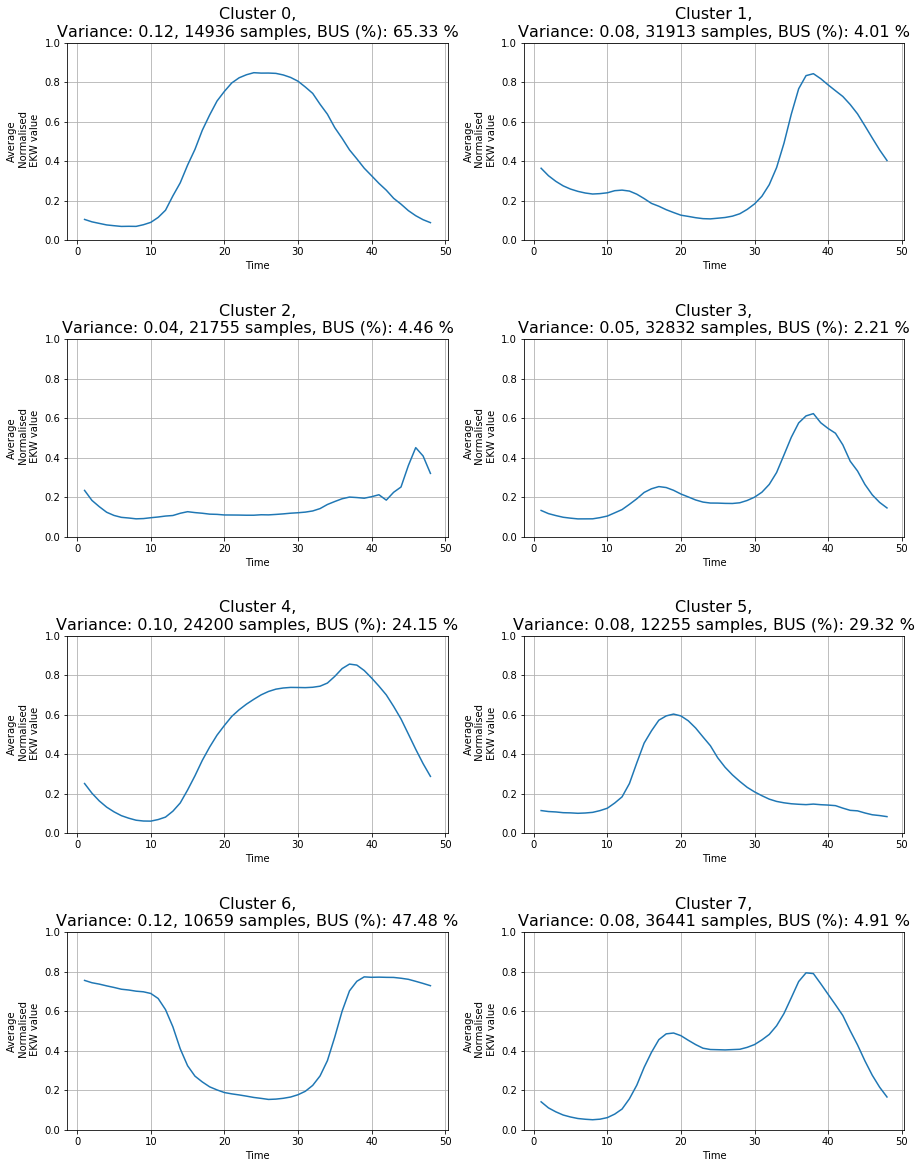

In [31]:
def get_cluster_stats(cluster_center, cluster_subset, attributes):
    intra_cluster_variance = np.var(np.asarray(cluster_subset))
    num_cluster_samples = cluster_subset.shape[0]
    return {
        'intra_cluster_variance': intra_cluster_variance,
        'num_cluster_samples': num_cluster_samples,
        'BUS': sum(attributes['ccc'] == 'BUS'),
        'RES': sum(attributes['ccc'] == 'RES')
    }


plt.figure(
    num='Cluster centres for each user\'s averaged, normalised weekend',
    figsize=(15, 20)
)

for i in range(n_clusters):
    cluster_stats = get_cluster_stats(
        kmeans.cluster_centers_[i, :],
        chosen_df.loc[kmeans.labels_ == i, :],
        attributes_df.loc[chosen_df.loc[kmeans.labels_ == i, :].index.intersection(attributes_df.index)]
    )
    
    plt.subplot(n_clusters / 2, 2, i+1)
    plt.plot(range(1, 49), kmeans.cluster_centers_[i, :])
    plt.title(
        f'Cluster {i},\nVariance: {cluster_stats["intra_cluster_variance"]:.2f}, {cluster_stats["num_cluster_samples"]} samples, BUS (%): {round(100 * cluster_stats["BUS"] / (cluster_stats["BUS"] + cluster_stats["RES"]), 2)} %',
        fontdict={
             'fontsize': 16
        }
    )
    
    plt.grid('on')
    plt.ylabel('Average\n Normalised\n EKW value')
    plt.xlabel('Time')
    plt.ylim(0, 1)
    plt.subplots_adjust(hspace=0.5)
plt.savefig('weekends.png')

In [30]:
! ls -l *png

-rw-r--r--  1 sarmadtarar  staff  146058  3 Jun 15:20 weekdays.png
-rw-r--r--  1 sarmadtarar  staff  128735  3 Jun 14:56 weekends.png
